# Proyecto Módulo 3
## Péndulo

### <span style="color:blue"> Ana María Aguilera Gómez

### <span style="color:blue"> Efraín Gómez Tapia
    
### <span style="color:blue"> Hector Oñate R.
    
![alt text](https://isngs.com/wp-content/uploads/2016/11/stock-market-trends-what-causes-stock-prices-to-change-768x576.jpg)

In [2]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [9]:
style.use('ggplot')

start='2017-01-03'
end='2017-11-20'

In [10]:
prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

prices

Date
2017-01-03    116.150002
2017-01-04    116.019997
2017-01-05    116.610001
2017-01-06    117.910004
2017-01-09    118.989998
2017-01-10    119.110001
2017-01-11    119.750000
2017-01-12    119.250000
2017-01-13    119.040001
2017-01-17    120.000000
2017-01-18    119.989998
2017-01-19    119.779999
2017-01-20    120.000000
2017-01-23    120.080002
2017-01-24    119.970001
2017-01-25    121.879997
2017-01-26    121.940002
2017-01-27    121.949997
2017-01-30    121.629997
2017-01-31    121.349998
2017-02-01    128.750000
2017-02-02    128.529999
2017-02-03    129.080002
2017-02-06    130.289993
2017-02-07    131.529999
2017-02-08    132.039993
2017-02-09    132.419998
2017-02-10    132.119995
2017-02-13    133.289993
2017-02-14    135.020004
                 ...    
2017-10-11    156.550003
2017-10-12    156.000000
2017-10-13    156.990005
2017-10-16    159.880005
2017-10-17    160.470001
2017-10-18    159.759995
2017-10-19    155.979996
2017-10-20    156.250000
2017-10-23    156.16

In [11]:
#Porcentaje del cambio (%)
returns = prices.pct_change()
returns

Date
2017-01-03         NaN
2017-01-04   -0.001119
2017-01-05    0.005085
2017-01-06    0.011148
2017-01-09    0.009159
2017-01-10    0.001009
2017-01-11    0.005373
2017-01-12   -0.004175
2017-01-13   -0.001761
2017-01-17    0.008065
2017-01-18   -0.000083
2017-01-19   -0.001750
2017-01-20    0.001837
2017-01-23    0.000667
2017-01-24   -0.000916
2017-01-25    0.015921
2017-01-26    0.000492
2017-01-27    0.000082
2017-01-30   -0.002624
2017-01-31   -0.002302
2017-02-01    0.060981
2017-02-02   -0.001709
2017-02-03    0.004279
2017-02-06    0.009374
2017-02-07    0.009517
2017-02-08    0.003877
2017-02-09    0.002878
2017-02-10   -0.002266
2017-02-13    0.008856
2017-02-14    0.012979
                ...   
2017-10-11    0.004169
2017-10-12   -0.003513
2017-10-13    0.006346
2017-10-16    0.018409
2017-10-17    0.003690
2017-10-18   -0.004425
2017-10-19   -0.023660
2017-10-20    0.001731
2017-10-23   -0.000512
2017-10-24    0.005955
2017-10-25   -0.004392
2017-10-26    0.006393
2017-1

In [12]:
last_price = prices[-1]
last_price

173.13999938964844

In [13]:
#Número de simulaciones
num_simulations = 1000
num_days = 252

In [14]:
simulations_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)

    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1

    simulations_df[x] = price_series

In [15]:
#Estimaciones de precio (random)
simulations_df[x]

0      172.418514
1      174.219489
2      175.047286
3      175.381308
4      179.530464
5      181.930362
6      183.909441
7      184.445912
8      185.026314
9      183.980642
10     181.459514
11     180.946871
12     178.254168
13     178.162946
14     181.028176
15     174.721705
16     173.506908
17     168.452289
18     167.903349
19     167.180737
20     166.684619
21     165.029672
22     162.002590
23     161.034619
24     158.518612
25     156.185614
26     158.282745
27     157.344151
28     157.606284
29     157.215169
          ...    
222    216.570016
223    214.660537
224    217.966515
225    215.508753
226    218.803425
227    219.302593
228    223.995541
229    222.023047
230    225.010787
231    222.537175
232    218.261865
233    221.051015
234    222.030725
235    217.891394
236    218.283356
237    218.119972
238    212.458939
239    211.464669
240    210.688495
241    208.439342
242    203.449444
243    201.747665
244    202.525223
245    201.108498
246    199

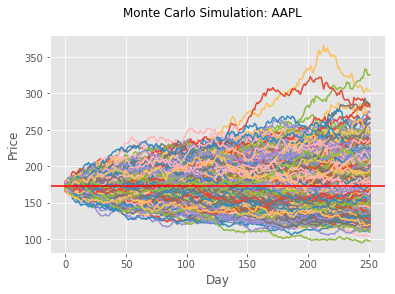

In [16]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulations_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

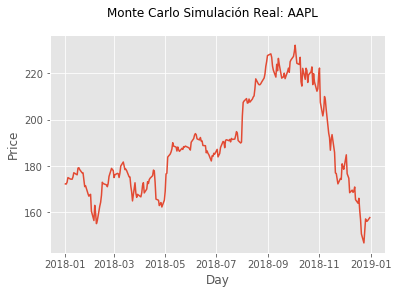

In [17]:
name='AAPL'
startreal='2018-01-01'
endreal='2018-12-31'

pricesreal = web.DataReader(name,'yahoo',startreal,endreal)['Close']

fig = plt.figure()
fig.suptitle('Monte Carlo Simulación Real: AAPL')
plt.plot(pricesreal)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

## Referencias:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.pct_change.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

https://finance.yahoo.com/